# **Clustering for Enhanced Stock Returns Forecasting**

In [4]:
!pip install yfinance -q
!pip install dtw -q
!pip install tslearn -q
!pip install dtaidistance -q

In [ ]:
import joblib
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import yfinance          as yf

tickers = [
    "3IN", "FOUR", "ABDN", "ALFA", "ALW", "ATT", "ALPH", "AO", "APAX", "ASHM", "DGN",
    "AGR", "AML", "ATG", "AGT", "BAB", "BGFD", "USA", "BAKK", "BBY", "BCG", "BNKR",
    "BGEO", "BAG", "BBGI", "AJB", "BBH", "BWY", "BHMG", "BYG", "BRGE", "BRSC", "THRG",
    "BRWM", "BMY", "BSIF", "BOY", "BREE", "BPT", "BVIC", "BUT", "BRBY", "BYIT", "CCR",
    "CLDN", "CGT", "CCL", "CWR", "CHG", "CHRY", "CTY", "CKN", "CBG", "CMCX", "COA",
    "CCC", "CWK", "CRST", "CURY", "DLN", "DLG", "DSCV", "DOM", "DWL", "DRX", "DOCS",
    "DNLM", "EDIN", "EWI", "ELM", "ESP", "ENOG", "ESNT", "EOT", "ESCT", "FCSS", "FEML",
    "FEV", "FSV", "FGT", "FGP", "FSG", "FSFL", "FUTR", "GAW", "GCP", "GEN", "GNS",
    "GSCT", "GDWN", "GFTU", "GRI", "GPE", "UKW", "GNC", "GRG", "HMSO", "HBR", "HVPE",
    "HWG", "HAS", "HTWS", "HET", "HSL", "HRI", "HGT", "HICL", "HILS", "HFG", "HOC",
    "BOWL", "HTG", "IBST", "ICGT", "IGG", "IEM", "INCH", "IHP", "IDS", "INPP", "INVP",
    "IPO", "ITH", "ITV", "IWG", "JLEN", "JMAT", "JAM", "JMG", "JEDT", "JGGI", "JII",
    "JFJ", "JTC", "JUP", "JUST", "KNOS", "KLR", "KIE", "LRE", "LWDB", "EMG", "MSLH",
    "MEGP", "MRC", "MRCH", "MTRO", "MAB", "MTO", "GROW", "MONY", "MNKS", "MOON",
    "MGAM", "MGNS", "MUT", "MYI", "NBPE", "NCC", "NESF", "N91", "NAS", "OCDO", "OSB",
    "OXIG", "PHI", "PAGE", "PIN", "PAG", "PPET", "PAY", "PNN", "PNL", "PHLL", "PETS",
    "PTEC", "PLUS", "PCFT", "PCT", "PPH", "PFD", "PHP", "PRSR", "PRTC", "PZC", "QQ",
    "QLT", "RPI", "RAT", "RWI", "RSW", "RHIM", "RCP", "ROR", "RS1", "RICA", "SAFE",
    "SVS", "SDP", "SOI", "SAIN", "SEIT", "SNR", "SEQI", "SRP", "SHC", "SRE", "SSON",
    "SCT", "SXS", "SPI", "SPT", "SSPG", "STEM", "STJ", "SUPR", "SYNC", "THRL", "TATE",
    "TBCG", "TEP", "TMPL", "TEM", "TRIG", "TIFS", "TCAP", "TRN", "TPK", "BBOX", "EBOX",
    "TRY", "TRST", "TFIF", "SHED", "VSVS", "VCT", "VEIL", "VOF", "FAN", "WPS", "WOSG",
    "JDW", "SMWH", "WIZZ", "WG", "WKP", "WWH", "XPS", "ZIG", "ASL"
]


In [ ]:

from google.colab       import drive
from sklearn.cluster    import KMeans
from sklearn.metrics    import mean_squared_error
from dtw                import dtw
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics    import dtw
from tslearn.utils      import to_time_series_dataset
from dtaidistance       import clustering
from google.colab       import files
# drive.mount('/content/drive')


# **1. DATA EXPLORATION**

## 1.1. Pre-processing

In [ ]:
start_date = "2010-01-01"
end_date = "2024-11-26"

historical_data = {}

for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    try:
        data = yf.download(ticker+'.L', start=start_date, end=end_date, interval="1d")
        historical_data[ticker] = data

    except Exception as e:
      try:
        data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
        historical_data[ticker] = data
      except Exception as e:
        print(f"Failed to fetch data for {ticker}: {e}")

Fetching data for 3IN...


[*********************100%***********************]  1 of 1 completed


Fetching data for FOUR...


[*********************100%***********************]  1 of 1 completed


Fetching data for ABDN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for ALFA...
Fetching data for ALW...


[*********************100%***********************]  1 of 1 completed


Fetching data for ATT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for ALPH...
Fetching data for AO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for APAX...
Fetching data for ASHM...


[*********************100%***********************]  1 of 1 completed


Fetching data for DGN...


[*********************100%***********************]  1 of 1 completed


Fetching data for AGR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for AML...
Fetching data for ATG...


[*********************100%***********************]  1 of 1 completed


Fetching data for AGT...


[*********************100%***********************]  1 of 1 completed


Fetching data for BAB...


[*********************100%***********************]  1 of 1 completed


Fetching data for BGFD...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for USA...
Fetching data for BAKK...


[*********************100%***********************]  1 of 1 completed


Fetching data for BBY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for BCG...
Fetching data for BNKR...


[*********************100%***********************]  1 of 1 completed


Fetching data for BGEO...


[*********************100%***********************]  1 of 1 completed


Fetching data for BAG...


[*********************100%***********************]  1 of 1 completed


Fetching data for BBGI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for AJB...
Fetching data for BBH...


[*********************100%***********************]  1 of 1 completed


Fetching data for BWY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for BHMG...
Fetching data for BYG...


[*********************100%***********************]  1 of 1 completed


Fetching data for BRGE...


[*********************100%***********************]  1 of 1 completed


Fetching data for BRSC...


[*********************100%***********************]  1 of 1 completed


Fetching data for THRG...


[*********************100%***********************]  1 of 1 completed


Fetching data for BRWM...


[*********************100%***********************]  1 of 1 completed


Fetching data for BMY...


[*********************100%***********************]  1 of 1 completed


Fetching data for BSIF...


[*********************100%***********************]  1 of 1 completed


Fetching data for BOY...


[*********************100%***********************]  1 of 1 completed


Fetching data for BREE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for BPT...
Fetching data for BVIC...


[*********************100%***********************]  1 of 1 completed


Fetching data for BUT...


[*********************100%***********************]  1 of 1 completed


Fetching data for BRBY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for BYIT...
Fetching data for CCR...


[*********************100%***********************]  1 of 1 completed


Fetching data for CLDN...


[*********************100%***********************]  1 of 1 completed


Fetching data for CGT...


[*********************100%***********************]  1 of 1 completed


Fetching data for CCL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for CWR...


Fetching data for CHG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for CHRY...
Fetching data for CTY...


[*********************100%***********************]  1 of 1 completed


Fetching data for CKN...


[*********************100%***********************]  1 of 1 completed


Fetching data for CBG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for CMCX...
Fetching data for COA...


[*********************100%***********************]  1 of 1 completed


Fetching data for CCC...


[*********************100%***********************]  1 of 1 completed


Fetching data for CWK...


[*********************100%***********************]  1 of 1 completed


Fetching data for CRST...


[*********************100%***********************]  1 of 1 completed


Fetching data for CURY...


[*********************100%***********************]  1 of 1 completed


Fetching data for DLN...


[*********************100%***********************]  1 of 1 completed


Fetching data for DLG...


[*********************100%***********************]  1 of 1 completed


Fetching data for DSCV...


[*********************100%***********************]  1 of 1 completed


Fetching data for DOM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for DWL...
Fetching data for DRX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for DOCS...
Fetching data for DNLM...


[*********************100%***********************]  1 of 1 completed


Fetching data for EDIN...


[*********************100%***********************]  1 of 1 completed


Fetching data for EWI...


[*********************100%***********************]  1 of 1 completed


Fetching data for ELM...


[*********************100%***********************]  1 of 1 completed


Fetching data for ESP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for ENOG...
Fetching data for ESNT...


[*********************100%***********************]  1 of 1 completed


Fetching data for EOT...


[*********************100%***********************]  1 of 1 completed


Fetching data for ESCT...


[*********************100%***********************]  1 of 1 completed


Fetching data for FCSS...


[*********************100%***********************]  1 of 1 completed


Fetching data for FEML...


[*********************100%***********************]  1 of 1 completed


Fetching data for FEV...


[*********************100%***********************]  1 of 1 completed


Fetching data for FSV...


[*********************100%***********************]  1 of 1 completed


Fetching data for FGT...


[*********************100%***********************]  1 of 1 completed


Fetching data for FGP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for FSG...
Fetching data for FSFL...


[*********************100%***********************]  1 of 1 completed


Fetching data for FUTR...


[*********************100%***********************]  1 of 1 completed


Fetching data for GAW...


[*********************100%***********************]  1 of 1 completed


Fetching data for GCP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for GEN...
Fetching data for GNS...


[*********************100%***********************]  1 of 1 completed


Fetching data for GSCT...


[*********************100%***********************]  1 of 1 completed


Fetching data for GDWN...


[*********************100%***********************]  1 of 1 completed


Fetching data for GFTU...


[*********************100%***********************]  1 of 1 completed


Fetching data for GRI...


[*********************100%***********************]  1 of 1 completed


Fetching data for GPE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for UKW...
Fetching data for GNC...


[*********************100%***********************]  1 of 1 completed


Fetching data for GRG...


[*********************100%***********************]  1 of 1 completed


Fetching data for HMSO...


[*********************100%***********************]  1 of 1 completed


Fetching data for HBR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for HVPE...
Fetching data for HWG...


[*********************100%***********************]  1 of 1 completed


Fetching data for HAS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for HTWS...
Fetching data for HET...


[*********************100%***********************]  1 of 1 completed


Fetching data for HSL...


[*********************100%***********************]  1 of 1 completed


Fetching data for HRI...


[*********************100%***********************]  1 of 1 completed


Fetching data for HGT...


[*********************100%***********************]  1 of 1 completed


Fetching data for HICL...


[*********************100%***********************]  1 of 1 completed


Fetching data for HILS...


[*********************100%***********************]  1 of 1 completed


Fetching data for HFG...


[*********************100%***********************]  1 of 1 completed


Fetching data for HOC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for BOWL...
Fetching data for HTG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for IBST...
Fetching data for ICGT...


[*********************100%***********************]  1 of 1 completed


Fetching data for IGG...


[*********************100%***********************]  1 of 1 completed


Fetching data for IEM...


[*********************100%***********************]  1 of 1 completed


Fetching data for INCH...


[*********************100%***********************]  1 of 1 completed


Fetching data for IHP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for IDS...


Fetching data for INPP...


[*********************100%***********************]  1 of 1 completed


Fetching data for INVP...


[*********************100%***********************]  1 of 1 completed


Fetching data for IPO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for ITH...
Fetching data for ITV...


[*********************100%***********************]  1 of 1 completed


Fetching data for IWG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for JLEN...
Fetching data for JMAT...


[*********************100%***********************]  1 of 1 completed


Fetching data for JAM...


[*********************100%***********************]  1 of 1 completed


Fetching data for JMG...


[*********************100%***********************]  1 of 1 completed


Fetching data for JEDT...


[*********************100%***********************]  1 of 1 completed


Fetching data for JGGI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for JII...


Fetching data for JFJ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for JTC...
Fetching data for JUP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for JUST...



[*********************100%***********************]  1 of 1 completed

Fetching data for KNOS...


Fetching data for KLR...


[*********************100%***********************]  1 of 1 completed


Fetching data for KIE...


[*********************100%***********************]  1 of 1 completed


Fetching data for LRE...


[*********************100%***********************]  1 of 1 completed


Fetching data for LWDB...


[*********************100%***********************]  1 of 1 completed


Fetching data for EMG...


[*********************100%***********************]  1 of 1 completed


Fetching data for MSLH...


[*********************100%***********************]  1 of 1 completed


Fetching data for MEGP...


[*********************100%***********************]  1 of 1 completed


Fetching data for MRC...


[*********************100%***********************]  1 of 1 completed


Fetching data for MRCH...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for MTRO...
Fetching data for MAB...


[*********************100%***********************]  1 of 1 completed


Fetching data for MTO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for GROW...
Fetching data for MONY...


[*********************100%***********************]  1 of 1 completed


Fetching data for MNKS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for MOON...
Fetching data for MGAM...


[*********************100%***********************]  1 of 1 completed


Fetching data for MGNS...


[*********************100%***********************]  1 of 1 completed


Fetching data for MUT...


[*********************100%***********************]  1 of 1 completed


Fetching data for MYI...


[*********************100%***********************]  1 of 1 completed


Fetching data for NBPE...


[*********************100%***********************]  1 of 1 completed


Fetching data for NCC...


[*********************100%***********************]  1 of 1 completed


Fetching data for NESF...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for N91...
Fetching data for NAS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for OCDO...


Fetching data for OSB...


[*********************100%***********************]  1 of 1 completed


Fetching data for OXIG...


[*********************100%***********************]  1 of 1 completed


Fetching data for PHI...


[*********************100%***********************]  1 of 1 completed


Fetching data for PAGE...


[*********************100%***********************]  1 of 1 completed


Fetching data for PIN...


[*********************100%***********************]  1 of 1 completed


Fetching data for PAG...


[*********************100%***********************]  1 of 1 completed


Fetching data for PPET...


[*********************100%***********************]  1 of 1 completed


Fetching data for PAY...


[*********************100%***********************]  1 of 1 completed


Fetching data for PNN...


[*********************100%***********************]  1 of 1 completed


Fetching data for PNL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for PHLL...
Fetching data for PETS...


[*********************100%***********************]  1 of 1 completed


Fetching data for PTEC...


[*********************100%***********************]  1 of 1 completed


Fetching data for PLUS...


[*********************100%***********************]  1 of 1 completed


Fetching data for PCFT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for PCT...
Fetching data for PPH...


[*********************100%***********************]  1 of 1 completed


Fetching data for PFD...


[*********************100%***********************]  1 of 1 completed


Fetching data for PHP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for PRSR...
Fetching data for PRTC...


[*********************100%***********************]  1 of 1 completed


Fetching data for PZC...


[*********************100%***********************]  1 of 1 completed


Fetching data for QQ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for QLT...
Fetching data for RPI...


[*********************100%***********************]  1 of 1 completed


Fetching data for RAT...


[*********************100%***********************]  1 of 1 completed


Fetching data for RWI...


[*********************100%***********************]  1 of 1 completed


Fetching data for RSW...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for RHIM...
Fetching data for RCP...


[*********************100%***********************]  1 of 1 completed


Fetching data for ROR...


[*********************100%***********************]  1 of 1 completed


Fetching data for RS1...


[*********************100%***********************]  1 of 1 completed


Fetching data for RICA...


[*********************100%***********************]  1 of 1 completed


Fetching data for SAFE...


[*********************100%***********************]  1 of 1 completed


Fetching data for SVS...


[*********************100%***********************]  1 of 1 completed


Fetching data for SDP...


[*********************100%***********************]  1 of 1 completed


Fetching data for SOI...


[*********************100%***********************]  1 of 1 completed


Fetching data for SAIN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for SEIT...
Fetching data for SNR...


[*********************100%***********************]  1 of 1 completed


Fetching data for SEQI...


[*********************100%***********************]  1 of 1 completed


Fetching data for SRP...


[*********************100%***********************]  1 of 1 completed


Fetching data for SHC...


[*********************100%***********************]  1 of 1 completed


Fetching data for SRE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for SSON...
Fetching data for SCT...


[*********************100%***********************]  1 of 1 completed


Fetching data for SXS...


[*********************100%***********************]  1 of 1 completed


Fetching data for SPI...


[*********************100%***********************]  1 of 1 completed


Fetching data for SPT...


[*********************100%***********************]  1 of 1 completed


Fetching data for SSPG...


[*********************100%***********************]  1 of 1 completed


Fetching data for STEM...


[*********************100%***********************]  1 of 1 completed


Fetching data for STJ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for SUPR...
Fetching data for SYNC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for THRL...


Fetching data for TATE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for TBCG...
Fetching data for TEP...


[*********************100%***********************]  1 of 1 completed


Fetching data for TMPL...


[*********************100%***********************]  1 of 1 completed


Fetching data for TEM...


[*********************100%***********************]  1 of 1 completed


Fetching data for TRIG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for TIFS...
Fetching data for TCAP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for TRN...
Fetching data for TPK...


[*********************100%***********************]  1 of 1 completed


Fetching data for BBOX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for EBOX...
Fetching data for TRY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for TRST...
Fetching data for TFIF...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for SHED...


Fetching data for VSVS...


[*********************100%***********************]  1 of 1 completed


Fetching data for VCT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for VEIL...
Fetching data for VOF...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for FAN...
Fetching data for WPS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for WOSG...
Fetching data for JDW...


[*********************100%***********************]  1 of 1 completed


Fetching data for SMWH...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for WIZZ...
Fetching data for WG...


[*********************100%***********************]  1 of 1 completed


Fetching data for WKP...


[*********************100%***********************]  1 of 1 completed


Fetching data for WWH...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for XPS...
Fetching data for ZIG...


[*********************100%***********************]  1 of 1 completed


Fetching data for ASL...


[*********************100%***********************]  1 of 1 completed


In [ ]:
df = pd.concat(historical_data, axis=1)
df.head()

3IN                                      \
Price                      Adj Close       Close        High         Low   
Ticker                         3IN.L       3IN.L       3IN.L       3IN.L   
Date                                                                       
2010-01-04 00:00:00+00:00  88.602913  144.962997  146.511002  143.556000   
2010-01-05 00:00:00+00:00  89.462898  146.369995  146.511002  144.259003   
2010-01-06 00:00:00+00:00  88.602913  144.962997  146.229996  144.259003   
2010-01-07 00:00:00+00:00  88.947029  145.526001  146.511002  143.837006   
2010-01-08 00:00:00+00:00  88.947029  145.526001  146.369995  145.384995   

                                                    FOUR                \
Price                            Open  Volume  Adj Close  Close   High   
Ticker                          3IN.L   3IN.L     FOUR.L FOUR.L FOUR.L   
Date                                                                     
2010-01-04 00:00:00+00:00  144.541000  330626  78.835579  125.0  125.0   
2010-01-05 00:00:00+00:00  144.399994  225520  78.835579  125.0  125.0   
2010-01-06 00:00:00+00:00  146.229996  202556  77.258873  122.5  125.0   
2010-01-07 00:00:00+00:00  146.511002  338889  79.466270  126.0  122.5   
2010-01-08 00:00:00+00:00  145.526001  257230  79.466270  126.0  128.0   

                                       ...         ZIG              \
Price                             Low  ...        High         Low   
Ticker                         FOUR.L  ...       ZIG.L       ZIG.L   
Date                                   ...                           
2010-01-04 00:00:00+00:00  125.000000  ...  226.000000  215.100006   
2010-01-05 00:00:00+00:00  125.000000  ...  229.899994  221.600006   
2010-01-06 00:00:00+00:00  124.000000  ...  229.800003  222.000000   
2010-01-07 00:00:00+00:00  122.010002  ...  232.000000  227.149994   
2010-01-08 00:00:00+00:00  126.000000  ...  234.899994  231.300003   

                                                      ASL                \
Price                            Open  Volume   Adj Close  Close   High   
Ticker                          ZIG.L   ZIG.L       ASL.L  ASL.L  ASL.L   
Date                                                                      
2010-01-04 00:00:00+00:00  222.600006  211365  472.454224  540.0  540.0   
2010-01-05 00:00:00+00:00  221.600006  291814  469.829285  537.0  539.0   
2010-01-06 00:00:00+00:00  222.000000  321499  464.579773  531.0  538.0   
2010-01-07 00:00:00+00:00  229.899994  131836  465.017334  531.5  536.5   
2010-01-08 00:00:00+00:00  234.500000  230831  468.954346  536.0  536.0   

                                                 
Price                        Low   Open  Volume  
Ticker                     ASL.L  ASL.L   ASL.L  
Date                                             
2010-01-04 00:00:00+00:00  527.5  534.0   69062  
2010-01-05 00:00:00+00:00  531.0  533.0   73173  
2010-01-06 00:00:00+00:00  531.0  538.0   62305  
2010-01-07 00:00:00+00:00  523.0  536.5  114426  
2010-01-08 00:00:00+00:00  525.5  527.5  214553  

[5 rows x 1500 columns]

In [ ]:
df_adj_close = df.xs('Adj Close', level=1, axis=1)
df_close = df.xs('Close', level=1, axis=1)
df_high = df.xs('High', level=1, axis=1)
df_low = df.xs('Low', level=1, axis=1)
df_open = df.xs('Open', level=1, axis=1)
df_volume = df.xs('Volume', level=1, axis=1)


In [ ]:
df_adj_close.to_csv('df_adj_close.csv')

In [ ]:
# Rename columns to reflect tickers only
df_adj_close.columns = df_adj_close.columns.get_level_values(0)
df_close.columns = df_close.columns.get_level_values(0)
df_high.columns = df_high.columns.get_level_values(0)
df_low.columns = df_low.columns.get_level_values(0)
df_open.columns = df_open.columns.get_level_values(0)
df_volume.columns = df_volume.columns.get_level_values(0)

# Now you have six DataFrames with ticker symbols as columns

In [ ]:
df_adj_close.to_csv('/content/drive/MyDrive/Edge Final Project/Yahoo Dataset/df_adj_close.csv')
df_close.to_csv('/content/drive/MyDrive/Edge Final Project/Yahoo Dataset/df_close.csv')
df_high.to_csv('/content/drive/MyDrive/Edge Final Project/Yahoo Dataset/df_high.csv')
df_low.to_csv('/content/drive/MyDrive/Edge Final Project/Yahoo Dataset/df_low.csv')
df_open.to_csv('/content/drive/MyDrive/Edge Final Project/Yahoo Dataset/df_open.csv')
df_volume.to_csv('/content/drive/MyDrive/Edge Final Project/Yahoo Dataset/df_volume.csv')

## 1.2. Exploratory Data Analysis

### 1.2.1. Let's see

In [ ]:
# Read CSV such that date is the index, unnecessary rows are skipped and
# time-series is seen as numbers.

df2       = pd.read_csv('df_adj_close.csv', index_col=0)
df2       = df2.iloc[2:]
df2.index = pd.to_datetime(df2.index).date
df2.index = pd.to_datetime(df2.index)
df2 = df2.astype(float)
df2.iloc[500:502]

Notice we have some missing values in the dataframe. Would this be a problem? Depends on the predictive model we'll use. If we use XG Boost on extracted features (lags, rolling means, etc) of multiple stocks, this shouldn't be a problem. An ARIMA model would struggle though. Let's see how many missing values we have.

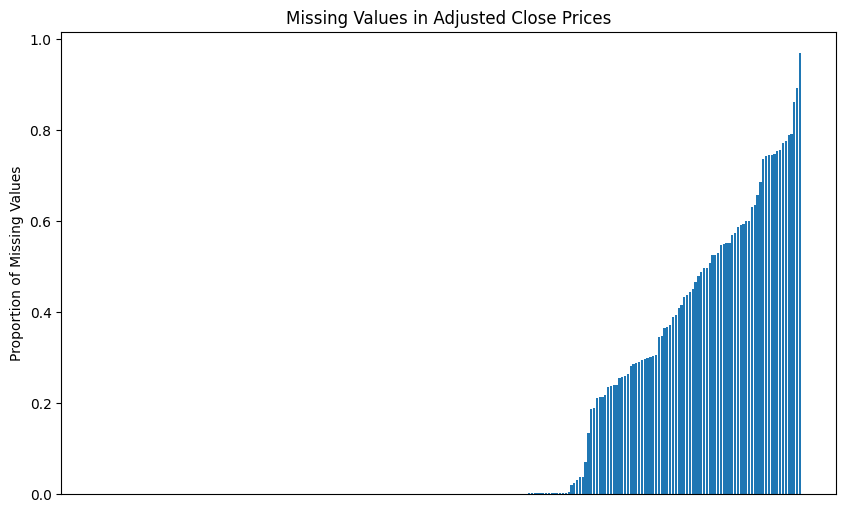

In [ ]:
miss_values = df2.apply(lambda x: sum(x.isna()) / len(x), axis=0).sort_values()

plt.figure(figsize=(10, 6))
plt.bar(miss_values.index, miss_values.values)
plt.ylabel("Proportion of Missing Values")
plt.xticks([])
plt.title("Missing Values in Adjusted Close Prices")
plt.show()

This seems reasonable. Intuitively I would suggest dropping stocks whose proportion of missing values exceeds a treshold and interpolate the rest. Let's do that later, and for now let's plot all the time-series to have an overview.

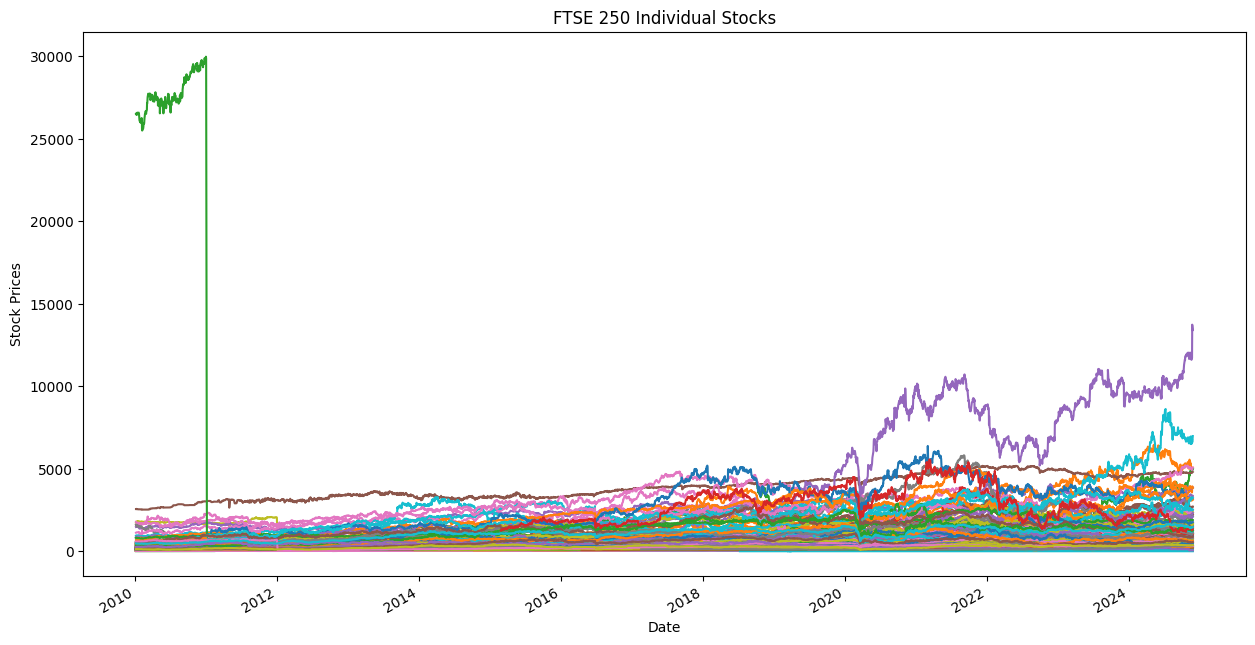

In [ ]:
df2.plot(figsize=(15, 8), title='FTSE 250 Individual Stocks', legend=False)
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.show()

First of all it seems there is something weird happening for one of the stocks. Why does the company have this huge valuation in 2010? Let's investigate whether our data may be corrupted.

### 1.2.2. Fixing the suspicious column

In [ ]:
df2_2010 = df2[:300]
suspicious_ticker = df2_2010.columns[df2_2010.max() > 20000]
suspicious_ticker

Index(['PNL'], dtype='object')

'PNL' is the ticker for 'Personal Assets Trust' on the London Stock Exchange. From what I saw online, it doesn't seem like their stock plumetted at once in 2011. Their stock's value around 2010 was around 280, definitely not in the 28,000! Intuitively, I think two zeros have been added mistakenly to the data for this period. Let's fix that.

In [ ]:
# Here's the breaking point
print(df2['PNL'].loc["2010-12-31"])
print(df2['PNL'].loc["2011-01-04"])

29849.623046875
301.4101867675781


In [ ]:
""" ONLY RUN THIS ONCE ! """
df2.loc[df2.index < pd.to_datetime('2011-01-01'), 'PNL'] = df2.loc[df2.index < pd.to_datetime('2011-01-01'), 'PNL'].apply(lambda x: x / 100)

In [ ]:
df2.loc[:, 'PNL']

,PNL
2010-01-04,265.145566
2010-01-05,265.334805
2010-01-06,264.861797
2010-01-07,264.388887
2010-01-08,264.388887
...,...
2024-11-19,494.000000
2024-11-20,493.500000
2024-11-21,495.500000
2024-11-22,497.000000


This now makes more sense!

### 1.2.3. Scaling

In [ ]:
ROLL_WINDOW = 20

rolling_mean = df2.rolling(window=ROLL_WINDOW, min_periods=1).mean()
rolling_std  = df2.rolling(window=ROLL_WINDOW, min_periods=1).std()

scaled_df = (df2 - rolling_mean) / rolling_std

scaled_df.iloc[500:502]

,3IN,FOUR,ABDN,ALFA,ALW,ATT,ALPH,AO,APAX,ASHM,...,WOSG,JDW,SMWH,WIZZ,WG,WKP,WWH,XPS,ZIG,ASL
2011-12-22,2.018316,-0.165333,0.108436,NaN,0.020040,-1.09246,NaN,NaN,NaN,-0.48470,...,NaN,-0.042659,-1.008248,NaN,-0.165089,-0.621658,1.850496,NaN,-1.269976,-0.854815
2011-12-23,1.830970,-0.213397,0.536615,NaN,0.286475,-0.35496,NaN,NaN,NaN,-0.49274,...,NaN,0.326299,-0.584036,NaN,0.411837,-0.920226,2.210772,NaN,-1.096842,-0.525866


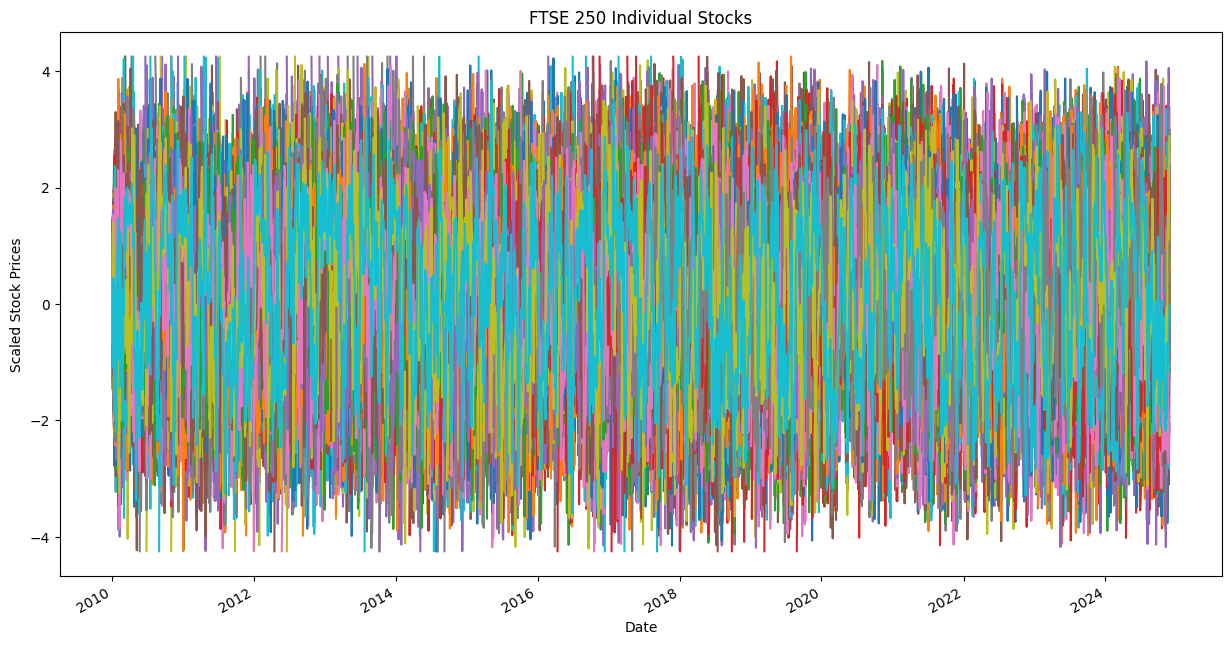

In [ ]:
scaled_df.plot(figsize=(15, 8), title='FTSE 250 Individual Stocks', legend=False)
plt.xlabel('Date')
plt.ylabel('Scaled Stock Prices')
plt.show()

Looks ugly but this is what we expected! There is way too much information within all FTSE 250 time-series for a predictive model to perform well. We need to find relevant information, through clustering!

# **2. CLUSTERING**

## 2.1. Dealing with missing values

Let's first get rid of tickers for which we have less than 20% of the data over the time horizon we're interested in. For the remaining tickers, let's interpolate the missing values linearly.

In [ ]:
# Drop tickers who have less than 20% non-null entries
percentage_miss_values = scaled_df.isnull().mean()
clean_scaled_df        = scaled_df.loc[:, percentage_miss_values <= 0.2].copy()

# Interpolate the remaining ones
clean_scaled_df = clean_scaled_df.interpolate(method='time', axis=0)

# Drop tickers who couldn't be interpolated well enough
sum_miss_values = clean_scaled_df.isnull().sum()
clean_scaled_df = clean_scaled_df.loc[:, sum_miss_values <= 100]

# Interpolate abruptly the few NaN values that remain
clean_scaled_df = clean_scaled_df.ffill().bfill()

print(f"We do not consider {250 - clean_scaled_df.shape[1]} tickers because they contain too much missing values.")

We do not consider 81 tickers because they contain too much missing values.


In [ ]:
clean_scaled_df

,3IN,FOUR,ABDN,ALW,ATT,ASHM,DGN,AGR,AGT,BAB,...,VSVS,VCT,VOF,JDW,SMWH,WG,WKP,WWH,ZIG,ASL
2010-01-04,0.707107,-1.154701,0.707107,0.707107,1.154701,-0.707107,0.707107,0.707107,0.707107,-0.707107,...,0.707107,-0.707107,0.707107,-0.707107,-0.707107,0.707107,0.707107,-0.707107,-0.707107,-0.707107
2010-01-05,0.707107,-1.154701,0.707107,0.707107,1.154701,-0.707107,0.707107,0.707107,0.707107,-0.707107,...,0.707107,-0.707107,0.707107,-0.707107,-0.707107,0.707107,0.707107,-0.707107,-0.707107,-0.707107
2010-01-06,-0.577350,-1.154701,0.458824,0.414808,1.154701,-1.133915,0.975951,-0.000010,-0.741723,-0.999990,...,1.150363,0.949159,-0.665751,-0.240227,-1.043641,1.104746,-0.577350,0.844492,1.115768,-1.091083
2010-01-07,0.106026,0.920945,-1.064263,-0.744323,0.500000,-1.446021,0.892216,-0.000009,0.135630,-0.783344,...,0.882182,0.978212,-0.799619,1.269013,-1.002276,1.266343,-0.993394,0.059660,1.240678,-0.772991
2010-01-08,0.097796,0.768276,0.053297,-0.994654,0.447214,-1.327354,0.189133,1.582509,1.553564,-0.048234,...,1.169254,1.381238,0.130003,1.686337,-0.904639,1.623769,-1.213558,1.525205,1.410234,0.235921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-19,1.355937,-0.919066,-0.155005,0.605648,0.811172,-1.468754,-0.832617,-0.705441,1.451898,1.759838,...,3.777231,0.820247,-1.517326,-0.640247,-1.228349,-1.099218,-0.844437,-2.362272,2.323634,-0.782239
2024-11-20,0.631016,-1.630163,-0.236128,0.380047,0.525990,-1.397142,-1.334276,-1.068286,0.075927,1.395347,...,2.450262,1.597408,-1.419765,-0.950563,-1.157675,-1.025520,-0.919173,-2.028704,1.101375,-1.152863
2024-11-21,-0.017854,-0.999984,0.502675,1.115615,1.227052,-1.137163,-1.803453,-0.969159,0.816826,1.380837,...,2.266057,0.521483,-0.598727,-0.458310,-1.484969,-0.864404,-0.792660,-1.322966,1.341491,-0.765372
2024-11-22,0.338381,-0.820777,0.724746,1.305945,1.186222,-0.835853,-1.866723,-0.522148,1.115798,1.361689,...,2.668081,1.594686,-0.591929,-0.300226,-1.148266,-0.783551,-0.453463,-1.190486,2.022282,-0.430434


## 2.2. DTW Clustering on Stock Closing Prices

I have tried using DTW, it is way too computationally expensive. Colab even crashed because of RAM issues multiple times. This is normal as the DTW algorithm tries to match stretching of each pair of timeseries it sees!

Let's therefore try to use an approximation version of it.

In [ ]:
stocks_df = clean_scaled_df['2017':'2021']
stocks_df = to_time_series_dataset(stocks_df.T.values) # so we can use tslearn, main dataframe!
stocks_df.shape

(169, 1265, 1)

In [ ]:
""" NO NEED TO RUN THIS AGAIN, I HAVE STORED EVERYTHING BELOW """

k_values = range(2, 10)
models   = {}
sum_of_squared_distances = []

for k in k_values:
    model = TimeSeriesKMeans(n_clusters=k, n_init=1, metric="dtw", n_jobs=-1, random_state=42)
    model.fit(stocks_df)
    sum_of_squared_distances.append(model.inertia_)
    models[k] = model

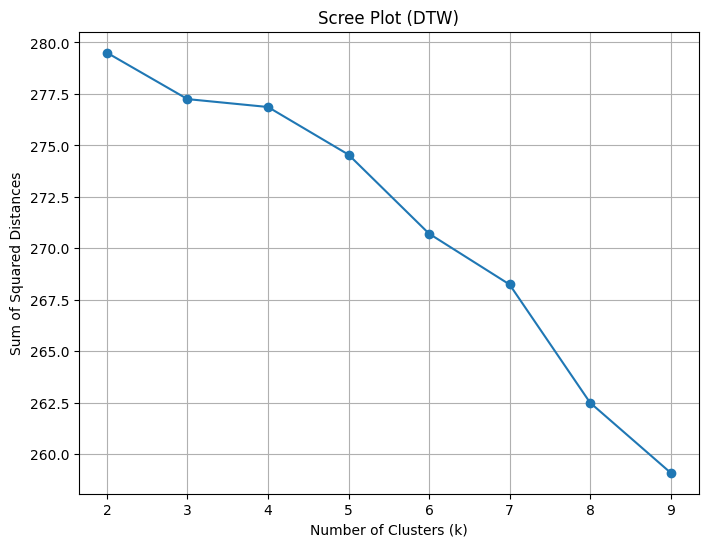

In [ ]:
""" NO NEED TO RUN THIS AGAIN, I HAVE STORED EVERYTHING BELOW """

plt.figure(figsize=(8, 6))
plt.plot(k_values, sum_of_squared_distances, marker='o')
plt.title('Scree Plot (DTW)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.xticks(k_values)
plt.grid()
plt.show()

This scree plot is interesting! It looks like the WCSS may decrease even more if k is 10 and above, let's investigate (after saving locally the model we already computed).

In [ ]:
""" NO NEED TO RUN THIS AGAIN, I HAVE STORED EVERYTHING BELOW """

for k, model in models.items():
    joblib.dump(model, f'dtw_model_{k}.pkl')
    files.download(f'dtw_model_{k}.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
""" NO NEED TO RUN THIS AGAIN, I HAVE STORED EVERYTHING BELOW """

k_values = range(10, 16)
models   = {}
sum_of_squared_distances = []

for k in k_values:
    model = TimeSeriesKMeans(n_clusters=k, n_init=1, metric="dtw", n_jobs=-1, random_state=42)
    model.fit(stocks_df)
    sum_of_squared_distances.append(model.inertia_)
    models[k] = model

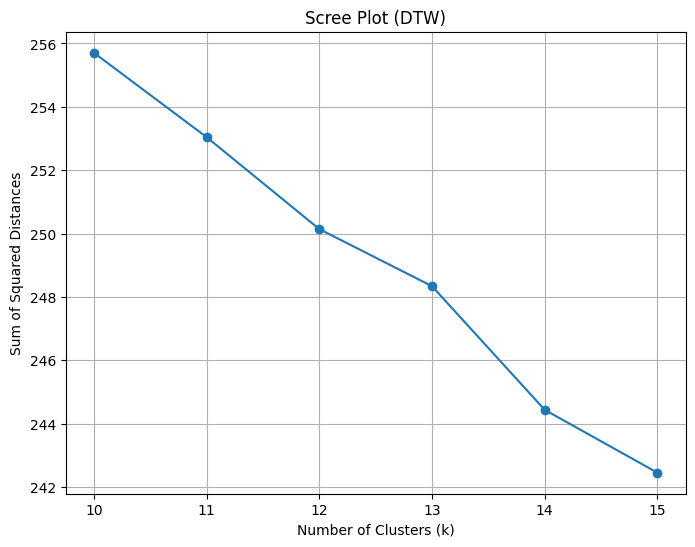

In [ ]:
""" NO NEED TO RUN THIS AGAIN, I HAVE STORED EVERYTHING BELOW """

plt.figure(figsize=(8, 6))
plt.plot(k_values, sum_of_squared_distances, marker='o')
plt.title('Scree Plot (DTW)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
""" NO NEED TO RUN THIS AGAIN, I HAVE STORED EVERYTHING BELOW """

for k, model in models.items():
    joblib.dump(model, f'dtw_model_{k}.pkl')
    files.download(f'dtw_model_{k}.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2.3 Acessing the clusters

In [ ]:
""" RUN THIS AFTER PUTTING MY ZIP IN YOUR ENVIRONMENT AND UNZIPPING """

all_models = {}

for k in range(2, 16):
    all_models[k] = joblib.load(f'dtw_model_{k}.pkl')

In [ ]:
sum_of_squared_distances = []

for k in range(2, 16):
    sum_of_squared_distances.append(all_models[k].inertia_)

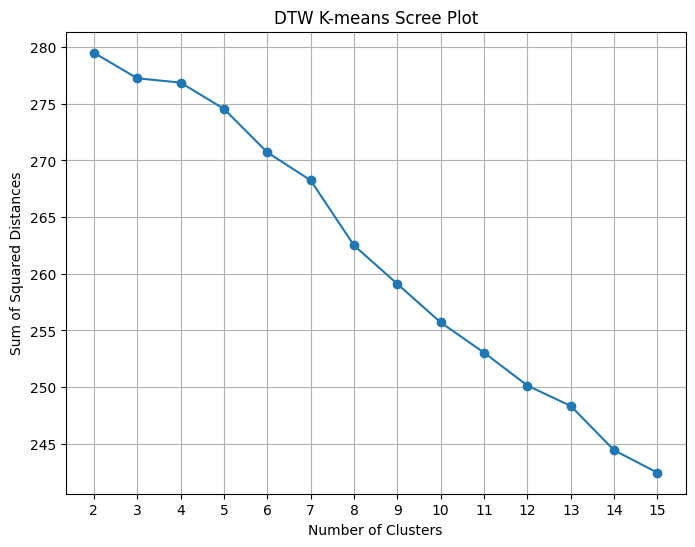

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2,16), sum_of_squared_distances, marker='o')
plt.title('DTW K-means Scree Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.xticks(range(2,16))
plt.grid()
plt.show()

In [ ]:
model = all_models[8]

stock_tickers      = clean_scaled_df.columns.tolist()

stock_cluster_list = list(zip(stock_tickers, model.labels_))

stock_cluster_df   = pd.DataFrame(stock_cluster_list, columns=['Ticker', 'Cluster'])

In [ ]:
stock_cluster_df.to_csv('stock_clusters.csv', index=False)

files.download('stock_clusters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **3. FORECASTING**

In [ ]:
from pathlib import Path
cwd = Path.cwd()

In [ ]:
pd.read_csv()

## 3.1 Trained on 1 timeseries to predict 1 timeseries

In [ ]:
# ... TO-DO ...

## 3.1 Trained on cluster of timeseries to predict 1 timeseries

In [ ]:
# ... TO-DO ...

## 3.3 Trained on all timeseries to predict 1 timeseries

In [ ]:
# ... TO-DO ...